For those who are already familliar with PyTorch, you can skip this. But if you are absolutely new to PyTorch please implement the tutorial at

https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

The objective is so you can differentiate the implementation using Numpy, Torch and Torch with Autograd. I'm assuming that no pre reading/studying is done (i.e you have come to class without going through the pytorch links on Spectrum)
 so I'm going to set the first 20 mins of the class for you to actually implement the tutorial above.

But just implementing the tutorial can be boring, especially if you are doing cnp in colab and not coding it again from scratch. So to slightly spice things up, please follow the instructions below.


1. Add some Gaussian noise to $y=sin(x)$ and plot the data.

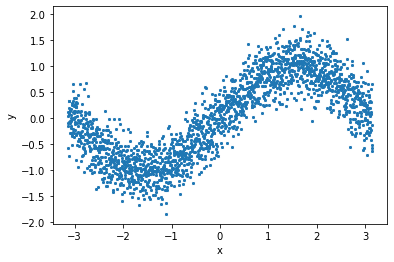

2. Plot the initial prediction when the weights were first initialized. An example is shown below. Your plot is obvious different because of the random initialization 
  

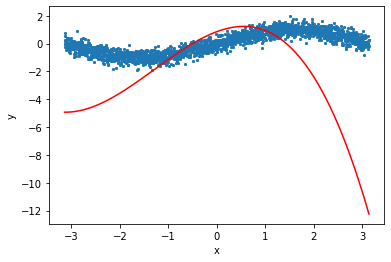


3. Print out the result of the final equation. Example shown below

4. Plot also the solutions at different epochs. An sample plot is shown below. I've not labelled the solution curves.

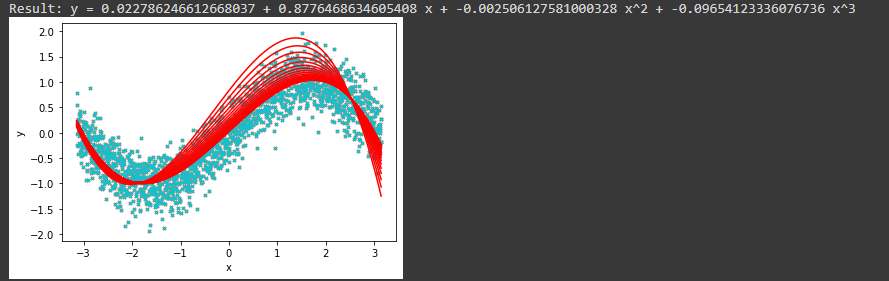

5. Plot the final solution only. Example shown below.

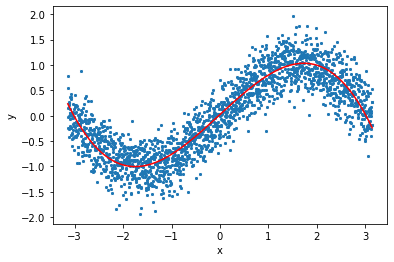

6. Plot the epoch vs loss graph. Example shown below


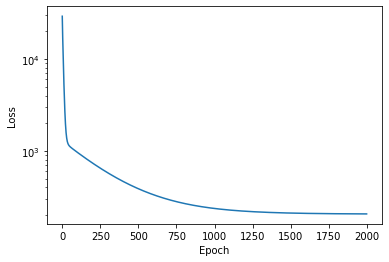

6. What is the purpose of this exercise?

In [1]:
import torch
import math
import matplotlib.pyplot as plt

tensor(-1.5256)


[]

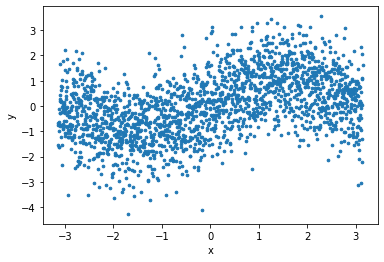

In [2]:
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

torch.manual_seed(1)
# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)
#Add Gaussian noise
noise = torch.randn(x.shape)
y = y + noise

print(noise[0])
plt.scatter(x,y, s = 7)

plt.xlabel("x")
plt.ylabel("y")
plt.plot()

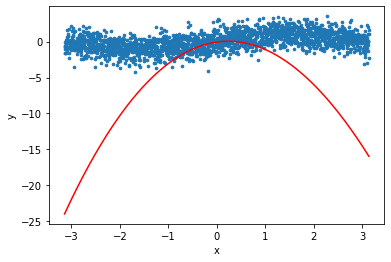

In [3]:
# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

initial_y_pred = a.item() + b.item() * x + c.item() * x ** 2 + d.item() * x ** 3

plt.scatter(x,y, s = 7)

plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,initial_y_pred, "r")

In [4]:
weight_history = []
loss_history = []
learning_rate = 1e-6
for t in range(2000):

    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    if t % 10 == 0:
        weight_history.append(a.item() + b.item() * x + c.item() * x ** 2 + d.item() * x ** 3)
    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 2172.637451171875
199 2160.485107421875
299 2151.94677734375
399 2145.9404296875
499 2141.7138671875
599 2138.73876953125
699 2136.643798828125
799 2135.16796875
899 2134.128173828125
999 2133.3955078125
1099 2132.87890625
1199 2132.5146484375
1299 2132.2578125
1399 2132.076416015625
1499 2131.948486328125
1599 2131.8583984375
1699 2131.794677734375
1799 2131.75
1899 2131.718017578125
1999 2131.695556640625
Result: y = 0.050723712891340256 + 0.8649340867996216 x + -0.011902200058102608 x^2 + -0.09638026356697083 x^3


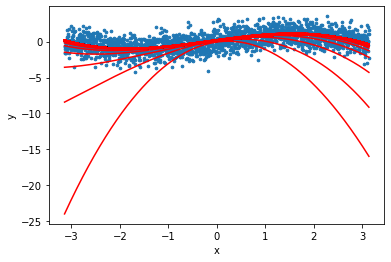

In [5]:
plt.scatter(x,y, s = 7)

for t in range(len(weight_history)):
  plt.plot(x,weight_history[t], "r")

plt.xlabel("x")
plt.ylabel("y")
plt.show()

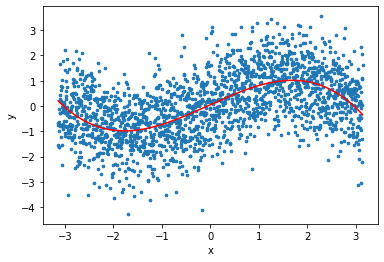

In [6]:
plt.scatter(x,y, s = 7)

plt.plot(x,weight_history[-1], "r")

plt.xlabel("x")
plt.ylabel("y")
plt.show()